In [647]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [648]:
df_sap = pd.read_csv("SAP.csv")
df_sap.head(5)

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA
0,2016-01-04,2016,1,4,Monday,1,2016-01,76.74,77.18,75.89,77.14,1075400.0,70.56,0.000000,70.560000,70.560000
1,2016-01-05,2016,1,5,Tuesday,1,2016-01,76.33,77.10,76.16,76.97,1392000.0,70.40,-0.002204,70.480000,70.480000
2,2016-01-06,2016,1,6,Wednesday,1,2016-01,76.81,77.79,76.66,77.65,1031600.0,71.03,0.008835,70.663333,70.663333
3,2016-01-07,2016,1,7,Thursday,1,2016-01,76.90,77.97,76.68,77.21,1670200.0,70.62,-0.005666,70.652500,70.652500
4,2016-01-08,2016,1,8,Friday,1,2016-01,78.27,78.35,76.76,76.90,1186800.0,70.34,-0.004015,70.590000,70.590000


In [649]:
df_spy = pd.read_csv("SPY.csv")
df_spy.head(5)

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA
0,2016-01-04,2016,1,4,Monday,1,2016-01,200.49,201.03,198.59,201.02,222353500.0,182.51,0.000000,182.510,182.510
1,2016-01-05,2016,1,5,Tuesday,1,2016-01,201.40,201.90,200.05,201.36,110845800.0,182.82,0.001691,182.665,182.665
2,2016-01-06,2016,1,6,Wednesday,1,2016-01,198.34,200.06,197.60,198.82,152112600.0,180.52,-0.012614,181.950,181.950
3,2016-01-07,2016,1,7,Thursday,1,2016-01,195.33,197.44,193.59,194.05,213436100.0,176.19,-0.023991,180.510,180.510
4,2016-01-08,2016,1,8,Friday,1,2016-01,195.19,195.85,191.58,191.92,209817200.0,174.25,-0.010977,179.258,179.258


#### Adding decision, overnight % and P/L columns to new Dataframe

In [650]:
df_sap_in = df_sap.copy()
df_spy_in = df_spy.copy()

In [651]:
def dec_pl(d_frame):
    ret_li1 = list()
    ret_li2 = list()
    ret_li3 = list()
    for i in range(len(d_frame)):
        if i == 0:
            ret_li1.append(None)
            ret_li2.append(0)
            ret_li3.append(0)
        elif d_frame["Open"][i] > d_frame["Close"][i-1]:
            ret_li1.append("long")
            ret_li2.append(round((100 / d_frame["Open"][i]) * (d_frame["Close"][i] - d_frame["Open"][i]),2))
            ret_li3.append(d_frame["Close"][i] - d_frame["Open"][i])
        elif d_frame["Open"][i] == d_frame["Close"][i-1]:
            ret_li1.append(None)
            ret_li2.append(0)
            ret_li3.append(0)
        elif d_frame["Open"][i] < d_frame["Close"][i-1]:
            ret_li1.append("short")
            ret_li2.append(round((100 / d_frame["Open"][i]) * (d_frame["Open"][i] - d_frame["Close"][i]),2))
            ret_li3.append(d_frame["Open"][i] - d_frame["Close"][i])
            
    return [ret_li1,ret_li2,ret_li3]
     

In [652]:
df_sap_in["decision"], df_sap_in["Overnight %"], df_sap_in["p/l"] = dec_pl(df_sap_in)
df_spy_in["decision"], df_spy_in["Overnight %"], df_spy_in["p/l"] = dec_pl(df_spy_in)

In [653]:
df_sap_in.tail(5)

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,decision,Overnight %,p/l
1254,2020-12-24,2020,12,24,Thursday,51,2020-51,125.92,126.31,125.60,126.06,223500.0,124.02,0.000476,122.470000,121.5332,short,-0.11,-0.14
1255,2020-12-28,2020,12,28,Monday,52,2020-52,129.34,131.00,128.08,130.91,1626100.0,128.80,0.038474,123.010714,121.0828,long,1.21,1.57
1256,2020-12-29,2020,12,29,Tuesday,52,2020-52,131.95,132.36,129.81,129.95,1058500.0,127.85,-0.007333,123.429286,120.5876,long,-1.52,-2.00
1257,2020-12-30,2020,12,30,Wednesday,52,2020-52,130.55,131.31,130.33,130.64,407200.0,128.53,0.005310,123.967857,120.1572,long,0.07,0.09
1258,2020-12-31,2020,12,31,Thursday,52,2020-52,130.67,130.86,129.65,130.39,379000.0,128.28,-0.001914,124.487143,119.7582,long,-0.21,-0.28


In [654]:
df_spy_in.head(5)

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,decision,Overnight %,p/l
0,2016-01-04,2016,1,4,Monday,1,2016-01,200.49,201.03,198.59,201.02,222353500.0,182.51,0.000000,182.510,182.510,None,0.00,0.00
1,2016-01-05,2016,1,5,Tuesday,1,2016-01,201.40,201.90,200.05,201.36,110845800.0,182.82,0.001691,182.665,182.665,long,-0.02,-0.04
2,2016-01-06,2016,1,6,Wednesday,1,2016-01,198.34,200.06,197.60,198.82,152112600.0,180.52,-0.012614,181.950,181.950,short,-0.24,-0.48
3,2016-01-07,2016,1,7,Thursday,1,2016-01,195.33,197.44,193.59,194.05,213436100.0,176.19,-0.023991,180.510,180.510,short,0.66,1.28
4,2016-01-08,2016,1,8,Friday,1,2016-01,195.19,195.85,191.58,191.92,209817200.0,174.25,-0.010977,179.258,179.258,long,-1.68,-3.27


#### Function to compute and create dataframe for summarizing each stock

In [655]:
years = [2016,2017,2018,2019,2020]

def day_sl(d_frame):
    ret_s = list()
    ret_l = list()
    ret_Ps = list()
    ret_Pl = list()
    ret_Pss = list()
    ret_Pll = list()
    for i in years:
        ret_s.append(d_frame[(d_frame["Year"] == i) & (d_frame["decision"] == "short")]["decision"].count())
        ret_l.append(d_frame[(d_frame["Year"] == i) & (d_frame["decision"] == "long")]["decision"].count())
        ret_Ps.append(d_frame[(d_frame["Year"] == i) & (d_frame["decision"] == "short")]["p/l"].sum())
        ret_Pl.append(d_frame[(d_frame["Year"] == i) & (d_frame["decision"] == "long")]["p/l"].sum())
        ret_Pss.append(d_frame[(d_frame["Year"] == i) & (d_frame["decision"] == "short")]["p/l"].mean())
        ret_Pll.append(d_frame[(d_frame["Year"] == i) & (d_frame["decision"] == "long")]["p/l"].mean()) 
    ret_s.append(sum(ret_s))
    ret_l.append(sum(ret_l))
    ret_Ps.append(sum(ret_Ps))
    ret_Pl.append(sum(ret_Pl))
    ret_Pss.append(sum(ret_Pss))
    ret_Pll.append(sum(ret_Pll))
    df = pd.DataFrame({"|S|":ret_s,"P(S)":ret_Ps,"P(S)/|S|":ret_Pss,"|L|":ret_l, \
                             "P(L)":ret_Pl,"P(L)/|L|":ret_Pll},index = ["1","2","3","4","5","1-5"])
    return df

In [686]:
df_sap_table = day_sl(df_sap_in)
print("SAP Summary Table")
df_sap_table.round({"P(S)":2,"P(S)/|S|":2,"P(L)":2,"P(L)/|L|":2})

SAP Summary Table


,|S|,P(S),P(S)/|S|,|L|,P(L),P(L)/|L|
1,133,-19.14,-0.14,115,-0.06,-0.00
2,128,-19.98,-0.16,118,3.22,0.03
3,106,5.15,0.05,144,-4.30,-0.03
4,126,-11.28,-0.09,125,3.27,0.03
5,110,-1.77,-0.02,142,-14.56,-0.10
1-5,603,-47.02,-0.36,644,-12.43,-0.08


In [687]:
df_spy_table = day_sl(df_spy_in)
print("S&P 500 Summary Table")
df_spy_table.round({"P(S)":2,"P(S)/|S|":2,"P(L)":2,"P(L)/|L|":2})

S&P 500 Summary Table


,|S|,P(S),P(S)/|S|,|L|,P(L),P(L)/|L|
1,113,-9.19,-0.08,128,8.92,0.07
2,96,-11.68,-0.12,142,3.34,0.02
3,110,28.48,0.26,141,-20.60,-0.15
4,104,-18.63,-0.18,147,17.04,0.12
5,109,-4.91,-0.05,144,1.12,0.01
1-5,532,-15.93,-0.17,702,9.82,0.07


### 1. what is the average daily profit for your stock and "spy"?

In [658]:
print(f"""
Daily average for my stock SAP{round(df_sap_table.loc["1-5"]["P(S)/|S|"] + df_sap_table.loc["1-5"]["P(L)/|L|"],3)} and 
Daily average for SPY{round(df_spy_table.loc["1-5"]["P(S)/|S|"] + df_spy_table.loc["1-5"]["P(L)/|L|"],3)}
""")


Daily average for my stock SAP-0.437 and 
Daily average for SPY-0.097



### 2. is the profit from "long" positions (when you buy) higher or lower than your profit from 'short" positions (when you sell short)? What is more profitable: long or short positions?

* My Stock SAP 
    * Short trading gave me Total loss of \$ 47.02
    * Long trading gave me Total loss of \$ 12.43
* SPY
    * Short trading gave me Total loss of \$ 15.93
    * Long trading gave me Total Profit of \$ 9.82
    
**Long position was better than the short position for both My stock and S&P500**

### 3. We would like to investigate the impact of this hyperparameter x. Take 100 points for x from 0 to 10% and plot the average profit per trade P(S + L)=|S + L| (over 5 years). Discuss your findings. Any patterns? Any optimal values for x?

In [659]:
def ovrnig_ret(d_frame,part):
    pct_points = np.arange(0.1,10.1,0.1)
    ret_li1 = list()
    for i in pct_points:
        if part == "longshort":
            if len(d_frame[d_frame["Overnight %"] > i]["p/l"]) > 0:
                ret_li1.append(d_frame[abs(d_frame["Overnight %"]) > i]["p/l"].mean())
            else:
                ret_li1.append(0)
        elif part == "short":
            if len(d_frame[(d_frame["Overnight %"] > i) & (d_frame["decision"] == "short")]["p/l"]) > 0:
                ret_li1.append(d_frame[abs(d_frame["Overnight %"]) > i]["p/l"].mean())
            else:
                ret_li1.append(0)
        elif part == "long":
            if len(d_frame[(d_frame["Overnight %"] > i) & (d_frame["decision"] == "long")]["p/l"]) > 0:
                ret_li1.append(d_frame[abs(d_frame["Overnight %"]) > i]["p/l"].mean())
            else:
                ret_li1.append(0)            
            
            
    ret_df1 = pd.DataFrame(ret_li1, index=pct_points, columns=["Avg profit per trade"])
    return ret_df1

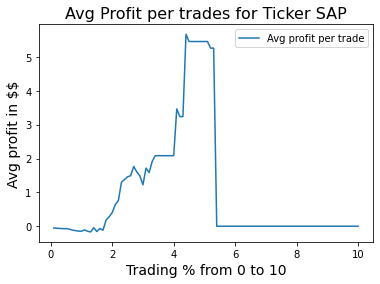

In [674]:
avg_p_sap = ovrnig_ret(df_sap_in,"longshort")
avg_p_sap.plot()
plt.xlabel("Trading % from 0 to 10",fontsize = 14)
plt.ylabel("Avg profit in \$$",fontsize = 14)
plt.title("Avg Profit per trades for Ticker SAP",fontsize = 16)
plt.show()

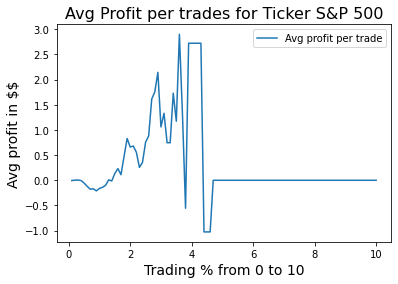

In [675]:
avg_p_spy = ovrnig_ret(df_spy_in,"longshort")
avg_p_spy.plot()
plt.xlabel("Trading % from 0 to 10",fontsize = 14)
plt.ylabel("Avg profit in \$$",fontsize = 14)
plt.title("Avg Profit per trades for Ticker S&P 500",fontsize = 16)
plt.show()

### 4. perform the above analysis separately for long and short positions (both your stock and S&P-500). Discuss your findings.

### Short Position

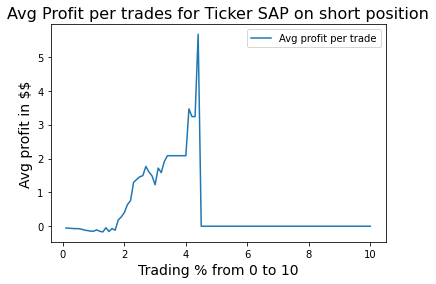

In [662]:
avg_p_sap = ovrnig_ret(df_sap_in,"short")
avg_p_sap.plot()
plt.xlabel("Trading % from 0 to 10",fontsize = 14)
plt.ylabel("Avg profit in \$$",fontsize = 14)
plt.title("Avg Profit per trades for Ticker SAP on short position",fontsize = 16)
plt.show()

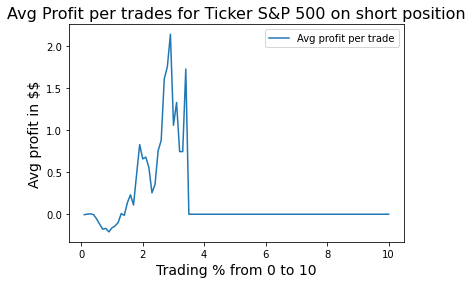

In [663]:
avg_p_spy = ovrnig_ret(df_spy_in,"short")
avg_p_spy.plot()
plt.xlabel("Trading % from 0 to 10",fontsize = 14)
plt.ylabel("Avg profit in \$$",fontsize = 14)
plt.title("Avg Profit per trades for Ticker S&P 500 on short position",fontsize = 16)
plt.show()

### Long Position

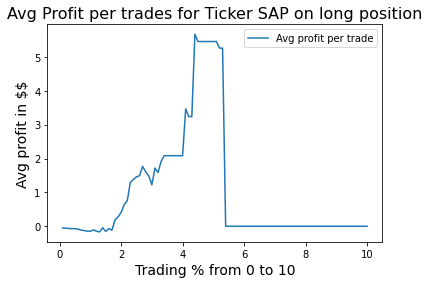

In [664]:
avg_p_sap = ovrnig_ret(df_sap_in,"long")
avg_p_sap.plot()
plt.xlabel("Trading % from 0 to 10",fontsize = 14)
plt.ylabel("Avg profit in \$$",fontsize = 14)
plt.title("Avg Profit per trades for Ticker SAP on long position",fontsize = 16)
plt.show()

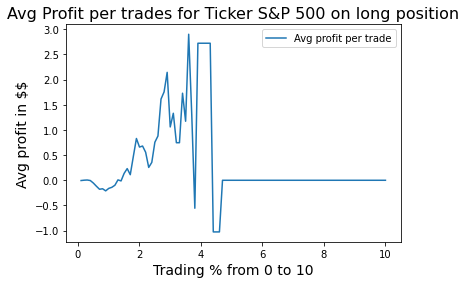

In [665]:
avg_p_spy = ovrnig_ret(df_spy_in,"long")
avg_p_spy.plot()
plt.xlabel("Trading % from 0 to 10",fontsize = 14)
plt.ylabel("Avg profit in \$$",fontsize = 14)
plt.title("Avg Profit per trades for Ticker S&P 500 on long position",fontsize = 16)
plt.show()

* Long position has given more average per trade profit for both SAP and SPY
* We can see negative profit for both long and short position for SPY.
* SAP has a relatively higher daily overnight return % then SPY.

### 5. plot two histograms on the distribution of last digit (cent position) for the "Open" prices for your stock and for S&P-500. What digit has the highest and the lowest frequency? For which security, the distribution seems to be more uni- form?

In [666]:
equal = {}
for i in range(1,10):
    equal[i] = 11.1
df_equal = pd.DataFrame(equal, index = ["Equal%"])
df_equal = df_equal.T

In [667]:
def cent_pos(d_frame):
    last_digit = list()
    for i in d_frame["Open"]:
        last_digit.append(int(str(i)[-1]))    
    last_digit = pd.Series(last_digit)
    
    actual = dict()
    for i in range(1,10):
        actual[i] = round((sum(np.where(last_digit == i, 1,0)) / len(d_frame[d_frame["Open"] > 1] )) * 100, 2)
    df_cent = pd.DataFrame(actual, index = ["Actual%"]).T
    return df_cent

In [668]:
df_cent_sap = cent_pos(df_sap_in)
df_cent_spy = cent_pos(df_spy_in)

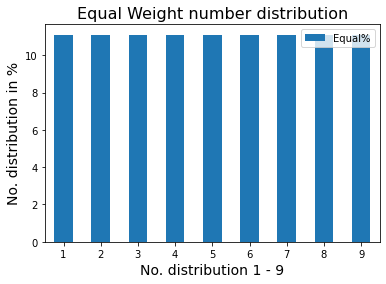

In [669]:
df_equal.plot.bar(rot = 0)
plt.xlabel("No. distribution 1 - 9",fontsize = 14)
plt.ylabel("No. distribution in %",fontsize = 14)
plt.title("Equal Weight number distribution",fontsize = 16)
plt.show()

In [670]:
df_cent_sap

,Actual%
1,9.93
2,11.60
3,10.09
4,10.25
5,10.96
6,11.52
7,11.91
8,12.71
9,9.85


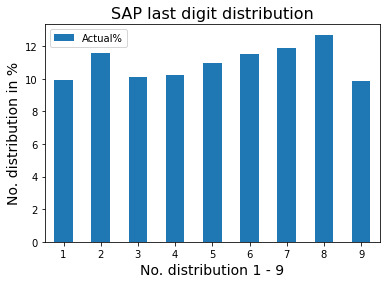

In [671]:
df_cent_sap.plot.bar(rot = 0)
plt.xlabel("No. distribution 1 - 9",fontsize = 14)
plt.ylabel("No. distribution in %",fontsize = 14)
plt.title("SAP last digit distribution",fontsize = 16)
plt.show()

#### SAP Stock

* Digit 8 has the highest frequency 12.71%
* Digit 1 has the lowest frequency 9.93%

In [672]:
df_cent_spy

,Actual%
1,11.68
2,10.80
3,9.93
4,12.79
5,9.93
6,11.60
7,12.31
8,9.29
9,9.93


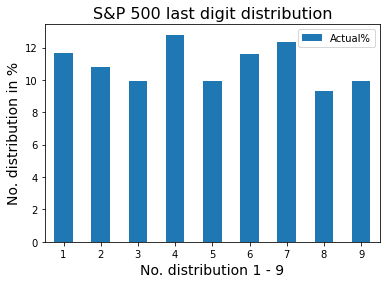

In [673]:
df_cent_spy.plot.bar(rot = 0)
plt.xlabel("No. distribution 1 - 9",fontsize = 14)
plt.ylabel("No. distribution in %",fontsize = 14)
plt.title("S&P 500 last digit distribution",fontsize = 16)
plt.show()

#### S&P 500 Stock

* Digit 4 has the highest frequency 12.79%
* Digit 8 has the lowest frequency 9.29%

#### SAP seems to have more uniform distribution between the two security